In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy as sp
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway


In [72]:
df = pd.read_csv('/Users/Peach/Dropbox/Dojo-env/dojo-env-setup/Stack4/Week3/Hypothesis-Testing-with-Insurance-Data/insurance - insurance.csv')

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?

In [73]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [74]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Creating Hypothesis

## ` Q1. Do smokers have higher insurance charges than non-smokers? `

* Null Hypothesis (H₀): Smokers and non-smokers have the same insurance charges.

* Alternative Hypothesis (H₁): Smokers have higher insurance charges than non-smokers.

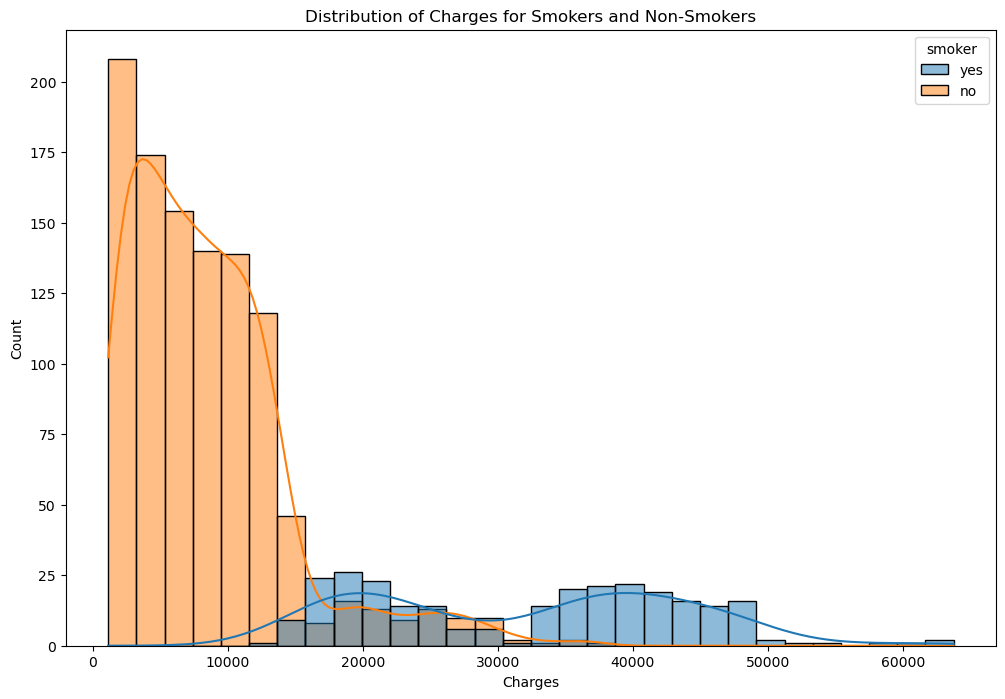

In [75]:
# Assumption 1: Normality of the data

fig, ax = plt.subplots(figsize=(12, 8))
sns.histplot(data=df, x='charges', hue='smoker', kde=True)
plt.title('Distribution of Charges for Smokers and Non-Smokers')
plt.xlabel('Charges')
plt.ylabel('Count')
plt.show()

In [76]:
smoker_charges = df[df['smoker'] == 'yes']['charges']
non_smoker_charges = df[df['smoker'] == 'no']['charges']

In [77]:
_, p_value = stats.levene(smoker_charges, non_smoker_charges)
print("Levene's test p-value:", p_value)

Levene's test p-value: 1.5593284881803726e-66


In [78]:
# Independent two-sample t-test
t_statistic, p_value = ttest_ind(smoker_charges, non_smoker_charges, equal_var=True)
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: 46.66492117272371
P-Value: 8.271435842179102e-283


In [79]:
alpha = 0.05  # Significance level

if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis




***

## ` Q2. Are men more likely to smoke than women? `

* Null Hypothesis (H₀): Men and women are equally as likely to smoke.

* Alternative Hypothesis (H₁): Men are more likely to smoke than women.


In [80]:
q2_samples = df[['smoker','sex']]
q2_samples

,smoker,sex
0,yes,female
1,no,male
2,no,male
3,no,male
4,no,male
...,...,...
1333,no,male
1334,no,female
1335,no,female
1336,no,female


In [81]:
contingency_table = pd.crosstab(df['sex'], df['smoker'])

In [82]:
# Chi-square test of independence
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print("Chi-square:", chi2)
print("P-Value:", p_value)

Chi-square: 7.39291081459996
P-Value: 0.006548143503580696


In [84]:
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


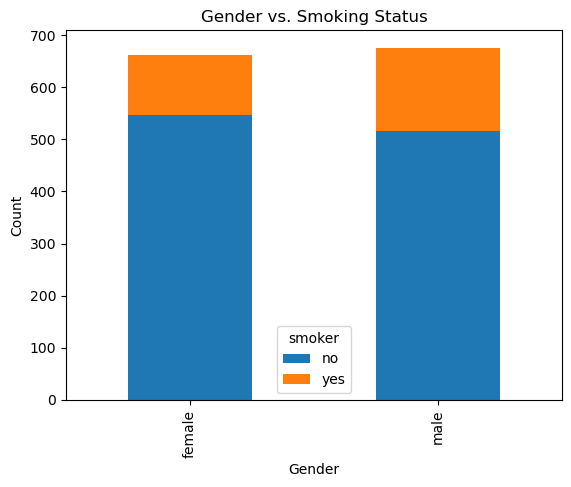

In [85]:
contingency_table.plot(kind='bar', stacked=True)
plt.title('Gender vs. Smoking Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()



***

 ## ` Q3. Do different regions have different charges, on average? `

* Null Hypothesis (H₀): Different regions on average have similar if not the same charges on average.

* Alternative Hypothesis (H₁): There are different charges on average dissimilar to other regions.


In [83]:
q3_samples = df[['region', 'charges']]
q3_samples

,region,charges
0,southwest,16884.92400
1,southeast,1725.55230
2,southeast,4449.46200
3,northwest,21984.47061
4,northwest,3866.85520
...,...,...
1333,northwest,10600.54830
1334,northeast,2205.98080
1335,southeast,1629.83350
1336,southwest,2007.94500




***